In [1]:
import sys 
import numpy as np 
import pandas as pd
from epiweeks import Week
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib as mpl

sys.path.append('../')
from utils import load_preds
# Definir a cor das bordas (spines) como cinza
mpl.rcParams['axes.edgecolor'] = 'gray'

# Definir a cor das linhas dos ticks maiores e menores como cinza
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.labelcolor'] = 'black'

In [2]:
states_ne = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'SE', 'RN']
states_se = ['SP', 'RJ', 'ES', 'MG']
states_sul = ['RS', 'SC', 'PR' ]
states_ce = ['DF', 'MT', 'MS', 'GO']
states_no = ['AP', 'TO', 'RR', 'RO', 'AM' ,'AC', 'PA']

states_BR = states_ne+states_se+states_no+states_ce+states_sul

In [3]:
dates_23b = pd.date_range(start= Week(2022, 25).startdate().strftime('%Y-%m-%d'),
              end= Week(2022, 41).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

dates_23 = pd.date_range(start= Week(2022, 41).startdate().strftime('%Y-%m-%d'),
              end= Week(2023, 39).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

dates_24b = pd.date_range(start= Week(2023, 25).startdate().strftime('%Y-%m-%d'),
              end= Week(2023, 41).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

dates_24 = pd.date_range(start= Week(2023, 41).startdate().strftime('%Y-%m-%d'),
              end= Week(2024, 23).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

dates_25 = pd.date_range(start= Week(2024, 41).startdate().strftime('%Y-%m-%d'),
              end= Week(2025, 40).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

UNIQUE_MODELS = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'E1', 'E2']
# Define colors manually, mapping each region to a color from tab10
colors = plt.get_cmap('Set2').colors[:len(UNIQUE_MODELS)]
COLOR_MAP = dict(zip(UNIQUE_MODELS, colors))
colors_  =  plt.get_cmap('tab10').colors
COLOR_MAP['M6'] = plt.get_cmap('Set2').colors[7]
COLOR_MAP['E1'] = colors[5]
COLOR_MAP['E2'] = colors_[3]

In [4]:
df_preds, models_by_state, data_all = load_preds(exclude = False)

df_ens_base = pd.read_csv(f'../predictions/ensemble_2023_2024_E1_mandatory.csv')
df_ens_base['model_id'] = 'E1'
df_ens_base.date = pd.to_datetime(df_ens_base.date)
df_preds = pd.concat([df_preds, df_ens_base], ignore_index = True)
df_preds['model_id'] = df_preds['model_id'].replace({'ln_crps': 'E2'})
df_preds = df_preds.loc[df_preds.model_id.isin(UNIQUE_MODELS)]
df_preds.head()

,date,pred,lower,upper,state,model_id
0,2022-10-09,110.690113,64.291013,219.826948,AC,M1
1,2025-08-10,192.641953,142.814506,261.828157,PR,M1
2,2025-08-17,171.137457,119.943438,233.918928,PR,M1
3,2025-08-24,196.875395,132.696765,267.461459,PR,M1
4,2025-08-31,179.610112,136.303073,247.230651,PR,M1


In [5]:
df_preds.isnull().sum()

date        0
pred        0
lower       0
upper       0
state       0
model_id    0
dtype: int64

### PLOT RETROSPECTIVE FORECASTS: 

In [6]:
def make_plot(ax0, ax1, state, data23, data23b, data24,data24b, df_preds23, df_preds24, color_map, legend = True, bbox_to_anchor = (1.0
                                                                           , 0.5, 0.1, 0.5)): 

    custom_lines = []
            
    ax0.plot(data23b.date, data23b.casos, color = 'black', marker = 'o', markersize = 2)
    ax0.plot(data23.date, data23.casos, color = 'black', ls = '--')
    ax0.set_title(f'Forecast - {state} - 2023')
    ax1.plot(data24b.date, data24b.casos, color = 'black', marker = 'o', markersize = 2)
    ax1.plot(data24.date, data24.casos, color = 'black', ls = '--')
    ax1.set_title(f'Forecast - {state} - 2024')
    
    for model_id in df_preds23.model_id.unique():
        color = color_map[model_id]

        df_preds23_ = df_preds23.loc[(df_preds23.model_id == model_id)]
        df_preds24_ = df_preds24.loc[(df_preds24.model_id == model_id)]
    
        try:
            if (model_id[0] == 'E'):
                ax0.plot(df_preds23_.date, df_preds23_.pred, linestyle = '-.', color = color, linewidth =2)
                ax0.fill_between(df_preds23_.date, df_preds23_.lower, df_preds23_.upper, color = color, alpha = 0.3)
        
                ax1.plot(df_preds24_.date, df_preds24_.pred, linestyle = '-.', color = color, linewidth = 2)
                ax1.fill_between(df_preds24_.date, df_preds24_.lower, df_preds24_.upper, color = color, alpha = 0.3)

                custom_lines.append(Line2D([0], [0], color=color, linestyle='-.', linewidth =2))

            else: 
                ax0.plot(df_preds23_.date, df_preds23_.pred, color = color, alpha=1)
                ax0.fill_between(df_preds23_.date, df_preds23_.lower, df_preds23_.upper, color = color, alpha = 0.1)
        
                ax1.plot(df_preds24_.date, df_preds24_.pred, color = color,  alpha=1)
                ax1.fill_between(df_preds24_.date, df_preds24_.lower, df_preds24_.upper, color = color, alpha = 0.1)

                custom_lines.append(Line2D([0], [0], color=color, linestyle='-', linewidth =2))
            
        except:
            print(f'Prediction for {state} from {model_id} is not available')  
                 
        #ax.set_title(f'{state} - 2025')
    
    for ax2 in [ax0, ax1]: 
        ax2.grid()
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # Format as 'Jan 22'
        
    ax0.set_ylabel('New cases', fontsize = 12)

    if legend: 
        custom_lines = list(custom_lines)
        names = list(df_preds23.model_id.unique())

        custom_lines.insert(0, Line2D([0], [0], color='black', linestyle='--', linewidth =2))

        names.insert(0, 'Data')
        
        
        ax1.legend(custom_lines, names, title ='Model', bbox_to_anchor=bbox_to_anchor)


In [7]:
def plot_state_for(ax0, ax1, state, df_preds, legend, bbox_to_anchor = (1.0
                                                                           , 0.5, 0.1, 0.5)):
    data_f = data_all.loc[data_all.uf == state]
    
    data23 = data_f.loc[data_f.date.isin(dates_23)]
    data24 = data_f.loc[data_f.date.isin(dates_24)]
    
    data23b = data_f.loc[data_f.date.isin(dates_23b)]
    data24b = data_f.loc[data_f.date.isin(dates_24b)]
    
    df_preds_f = df_preds.loc[df_preds.state ==state]
    df_preds23 = df_preds_f.loc[df_preds_f.date.isin(dates_23)].sort_values(by = 'date')
    df_preds24 = df_preds_f.loc[df_preds_f.date.isin(dates_24)].sort_values(by = 'date')
    
    make_plot(ax0, ax1,state, data23, data23b, data24, data24b, df_preds23, df_preds24, COLOR_MAP, 
             legend = legend, bbox_to_anchor = bbox_to_anchor)

In [8]:
df_preds.model_id.unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'E2', 'E1'], dtype=object)

In [9]:
df_preds_models = df_preds.loc[
                  df_preds.model_id.isin(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7'])]

df_preds_models.model_id.unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7'], dtype=object)

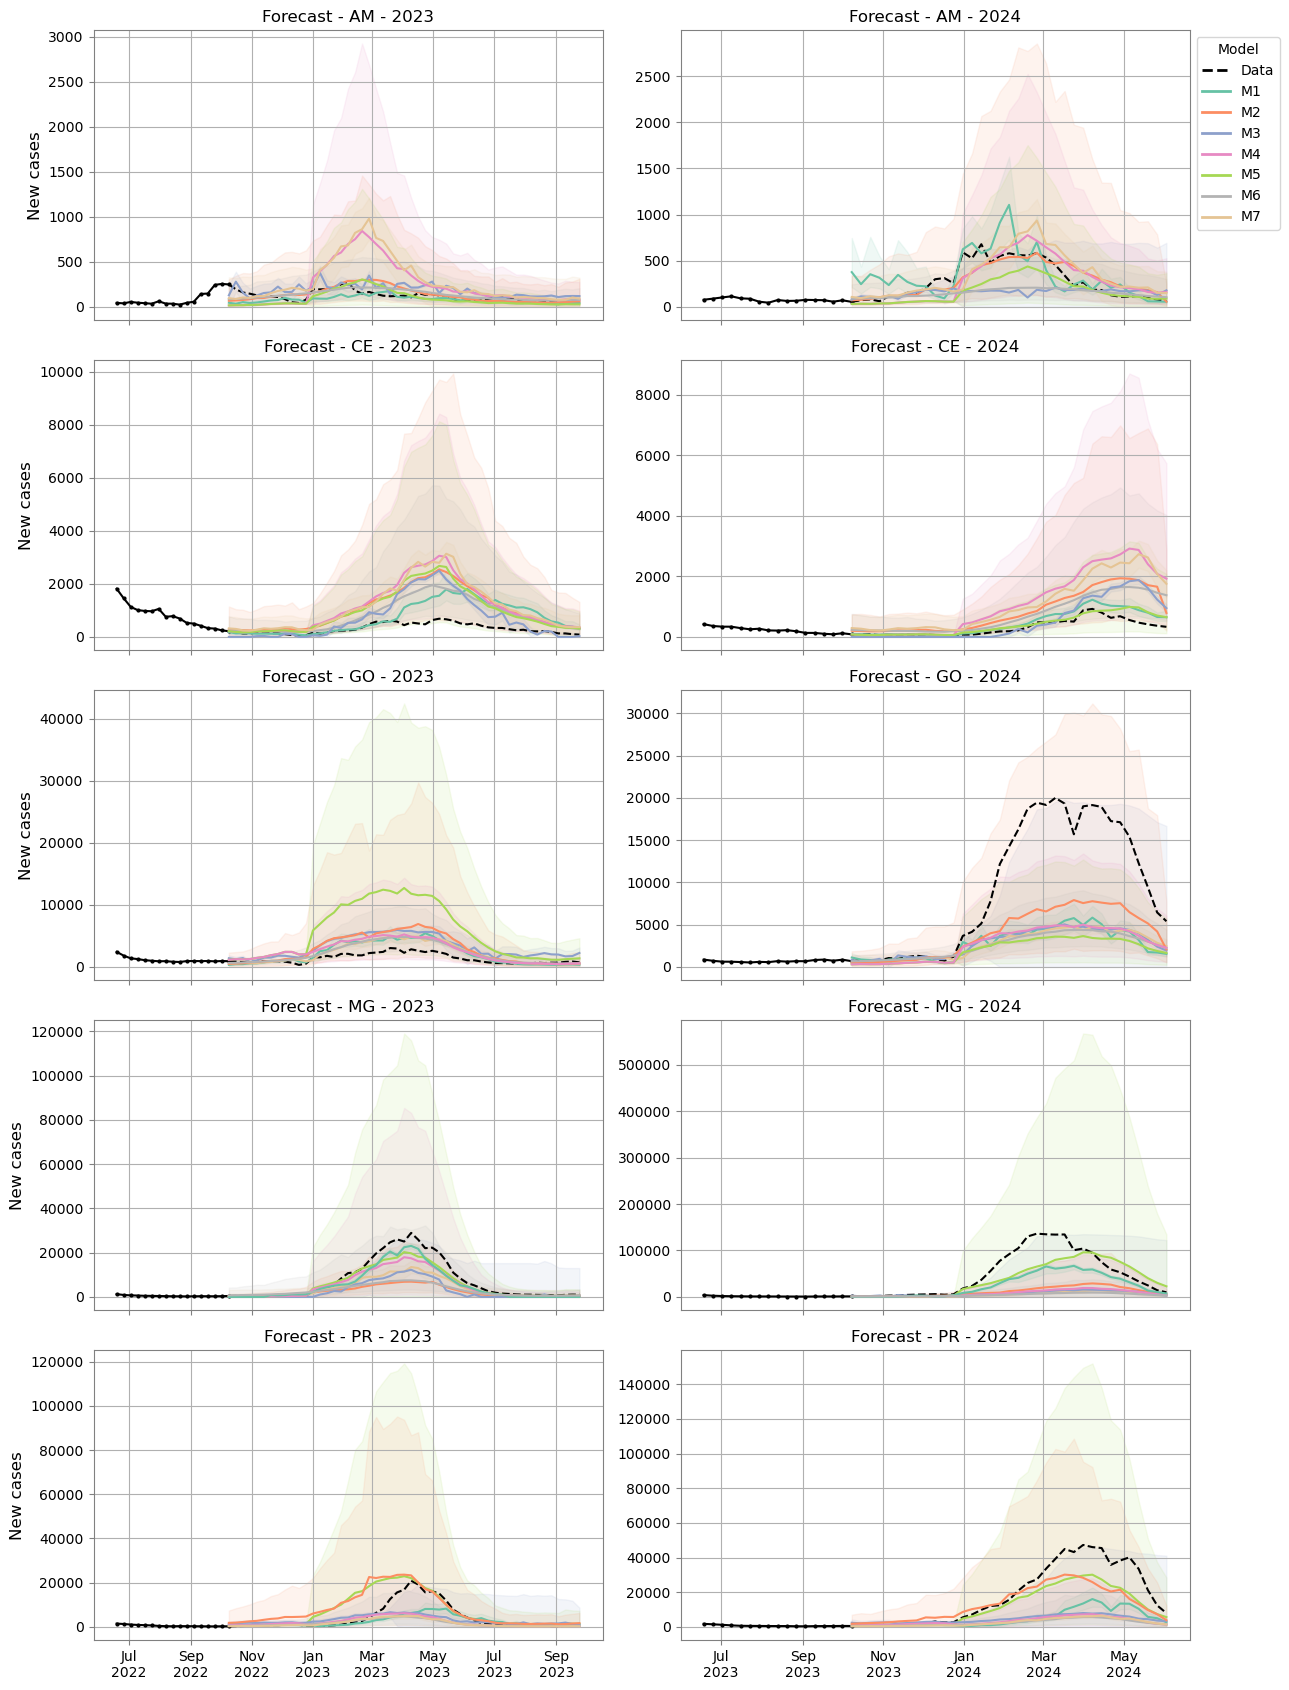

In [10]:
fig, ax = plt.subplots(5, 2, figsize = (13, 17))

plot_state_for(ax[0,0], ax[0,1], 'AM',df_preds_models, True)
plot_state_for(ax[1,0], ax[1,1], 'CE',df_preds_models, False)
plot_state_for(ax[2,0], ax[2,1], 'GO',df_preds_models, False)
plot_state_for(ax[3,0], ax[3,1], 'MG',df_preds_models, False)
plot_state_for(ax[4,0], ax[4,1], 'PR',df_preds_models, False)

for ax_ in ax.ravel()[:-2]:
    ax_.set_xticklabels([])
    
plt.tight_layout()
#ax[0].set_xlabel('Date')
#ax[1].set_xlabel('Date')

plt.savefig('../figures/forecast_mandatory_models.pdf', bbox_inches = 'tight')
plt.show()

In [11]:
df_preds_ens = df_preds.loc[
                  df_preds.model_id.isin(['E1', 'E2'])]

df_preds_ens.model_id.unique()

array(['E2', 'E1'], dtype=object)

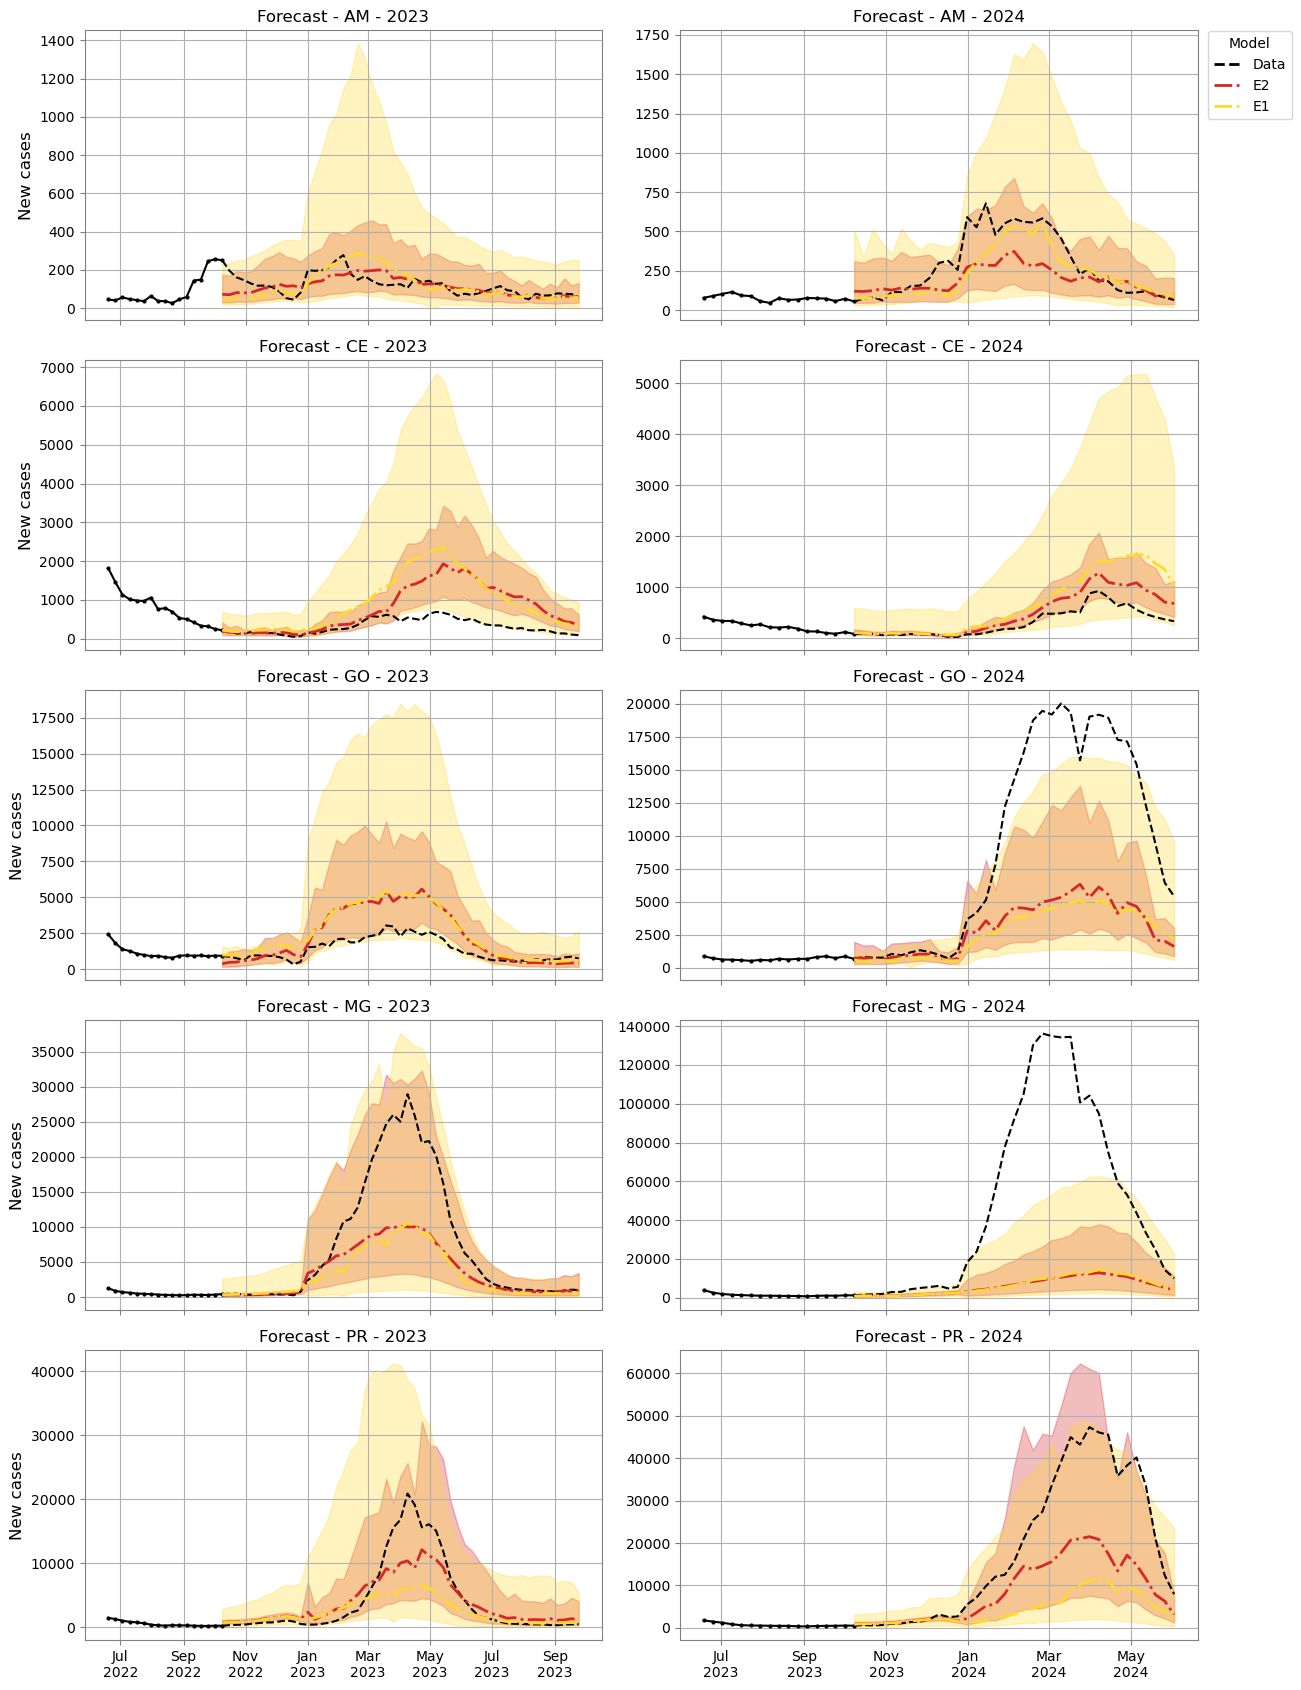

In [12]:
fig, ax = plt.subplots(5, 2, figsize = (13, 17))

plot_state_for(ax[0,0], ax[0,1], 'AM',df_preds_ens, True, bbox_to_anchor = (1.095
                                                                           , 0.52, 0.1, 0.5))
plot_state_for(ax[1,0], ax[1,1], 'CE',df_preds_ens, False)
plot_state_for(ax[2,0], ax[2,1], 'GO',df_preds_ens, False)
plot_state_for(ax[3,0], ax[3,1], 'MG',df_preds_ens, False)
plot_state_for(ax[4,0], ax[4,1], 'PR',df_preds_ens, False)

for ax_ in ax.ravel()[:-2]:
    ax_.set_xticklabels([])
    
plt.tight_layout()
#ax[0].set_xlabel('Date')
#ax[1].set_xlabel('Date')

plt.savefig('../figures/forecast_mandatory_ensemble.pdf', bbox_inches = 'tight')
plt.show()